In [1]:
pip install tensorflow keras

In [2]:
pip install numpy tensorflow_datasets

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras 

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

In [5]:
ds = tfds.load('cifar100')
ds

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.0.incompleteJ5GF95/cifar100-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.0.incompleteJ5GF95/cifar100-test.tfrecord


Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.0. Subsequent calls will reuse this data.


{'test': <DatasetV1Adapter shapes: {coarse_label: (), image: (32, 32, 3), label: ()}, types: {coarse_label: tf.int64, image: tf.uint8, label: tf.int64}>,
 'train': <DatasetV1Adapter shapes: {coarse_label: (), image: (32, 32, 3), label: ()}, types: {coarse_label: tf.int64, image: tf.uint8, label: tf.int64}>}

In [6]:
builder = tfds.builder('cifar100')
info = builder.info

info

tfds.core.DatasetInfo(
    name='cifar100',
    version=3.0.0,
    description='This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=20),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=100),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mul

In [7]:
ds_train = tfds.load(name="cifar100", split="train")
ds_test = tfds.load(name="cifar100", split="test")

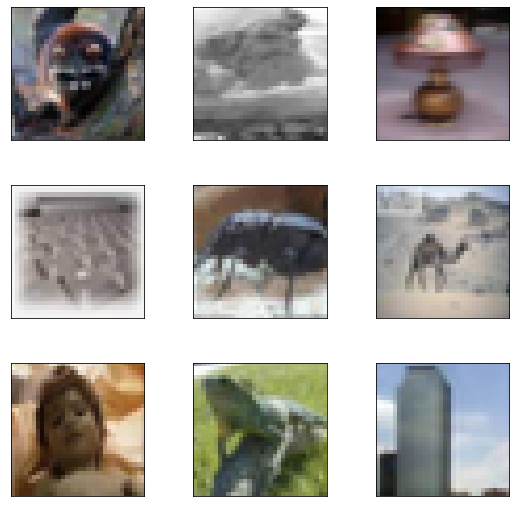

In [8]:
fig = tfds.show_examples(info, ds_train)

In [9]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [26]:
import matplotlib.pyplot as plt

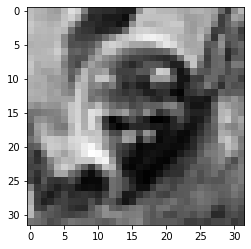

In [27]:
image = train_images[0].reshape(32,32)

plt.imshow(image, cmap='Greys_r')

In [24]:
train_images = train_images.reshape(50000, 32, 32, 1)
test_images = test_images.reshape(10000, 32, 32, 1)

# train_images = train_images.astype('float32')
# test_images = test_images.astype('float32')

# train_images /= 255
# test_images /= 255

In [25]:
model = keras.Sequential([
  keras.layers.Conv2D(256, (3,3), input_shape=train_images.shape[1:]),
  keras.layers.Activation('relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),

  keras.layers.Conv2D(256, (3,3)),
  keras.layers.Activation("relu"),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Dropout(0.2),

  keras.layers.Flatten(),
  keras.layers.Dense(100, activation=tf.nn.softmax),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 4.7178 - accuracy: 0.0123
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 4.5661 - accuracy: 0.0179
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 4.5311 - accuracy: 0.0241
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 4.4578 - accuracy: 0.0389
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 4.3560 - accuracy: 0.0573
